In [1]:
import pandas as pd

solar_CF_all = pd.read_csv("/Users/au722787/Desktop/Renewable Energy Systems/作业02-10.9前提交/Input/pv_optimal.csv",sep=';',index_col=[0],header=0)
wind_CF_all = pd.read_csv("/Users/au722787/Desktop/Renewable Energy Systems/作业02-10.9前提交/Input/onshore_wind_1979-2017.csv",sep=';',index_col=[0],header=0)
el_dm_all = pd.read_csv("/Users/au722787/Desktop/Renewable Energy Systems/作业02-10.9前提交/Input/Electricity_demand_02.csv",sep=';',index_col=[0],header=0)
heat_dm_all = pd.read_csv("/Users/au722787/Desktop/Renewable Energy Systems/作业02-10.9前提交/Input/Heating_demand_02.csv",sep=';',index_col=[0],header=0)


solar_CF = solar_CF_all.loc['2017-01-01T00:00:00Z': :]
wind_CF = wind_CF_all.loc['2017-01-01T00:00:00Z': :]
el_dm=el_dm_all/el_dm_all.mean()
heat_dm=heat_dm_all/heat_dm_all.mean()


1.Start by plotting the capacity factors for wind and solar throughout the first two weeks in January and the first two weeks in July. Do this for the most recent year for which you have available data.


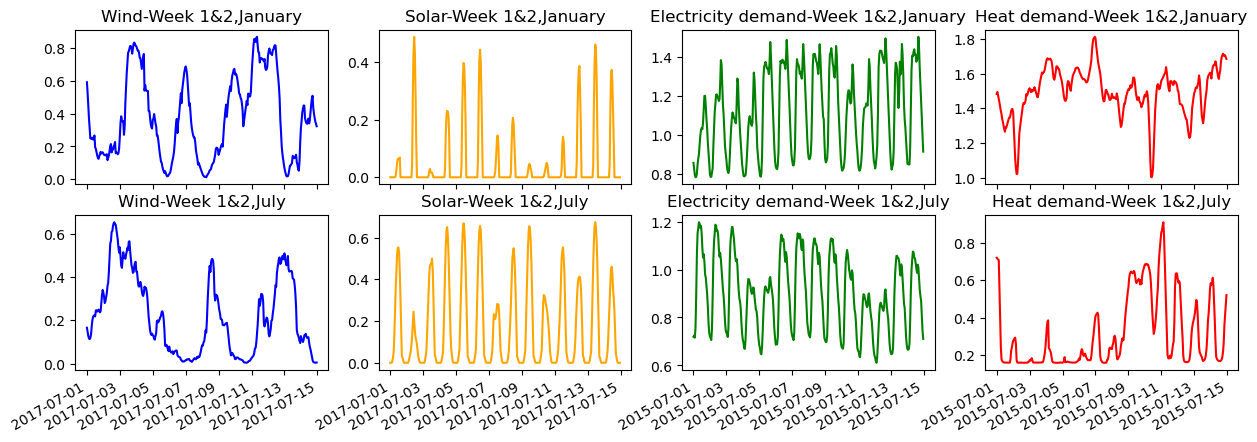

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,4, figsize=(15,5))

solar_CF.index = pd.to_datetime(solar_CF.index)
wind_CF.index = pd.to_datetime(wind_CF.index)
el_dm.index = pd.to_datetime(el_dm.index)
heat_dm.index = pd.to_datetime(heat_dm.index)

axs[0,0].plot(wind_CF.loc['2017-01-01':'2017-01-14']['DNK'],color='blue')
axs[0,0].set_title('Wind-Week 1&2,January')
axs[0,1].plot(solar_CF.loc['2017-01-01':'2017-01-14']['DNK'],color='orange')
axs[0,1].set_title("Solar-Week 1&2,January")
axs[0,2].plot(el_dm.loc['2015-01-01':'2015-01-14']['DNK'],color='green')
axs[0,2].set_title('Electricity demand-Week 1&2,January')
axs[0,3].plot(heat_dm.loc['2015-01-01':'2015-01-14']['DNK'],color='red')
axs[0,3].set_title('Heat demand-Week 1&2,January')

axs[1,0].plot(wind_CF.loc['2017-07-01':'2017-07-14']['DNK'],color='blue')
axs[1,0].set_title('Wind-Week 1&2,July')
axs[1,1].plot(solar_CF.loc['2017-07-01':'2017-07-14']['DNK'],color='orange')
axs[1,1].set_title('Solar-Week 1&2,July')
axs[1,2].plot(el_dm.loc['2015-07-01':'2015-07-14']['DNK'],color='green')
axs[1,2].set_title('Electricity demand-Week 1&2,July')
axs[1,3].plot(heat_dm.loc['2015-07-01':'2015-07-14']['DNK'],color='red')
axs[1,3].set_title('Heat demand-Week 1&2,July')

fig.autofmt_xdate()


2.Calculate the average capacity factor for every day of the year and plot them. Do the same for capacities averaged by week and month.Based on steps 1 and 2. What are the dominant frequencies for every technology?


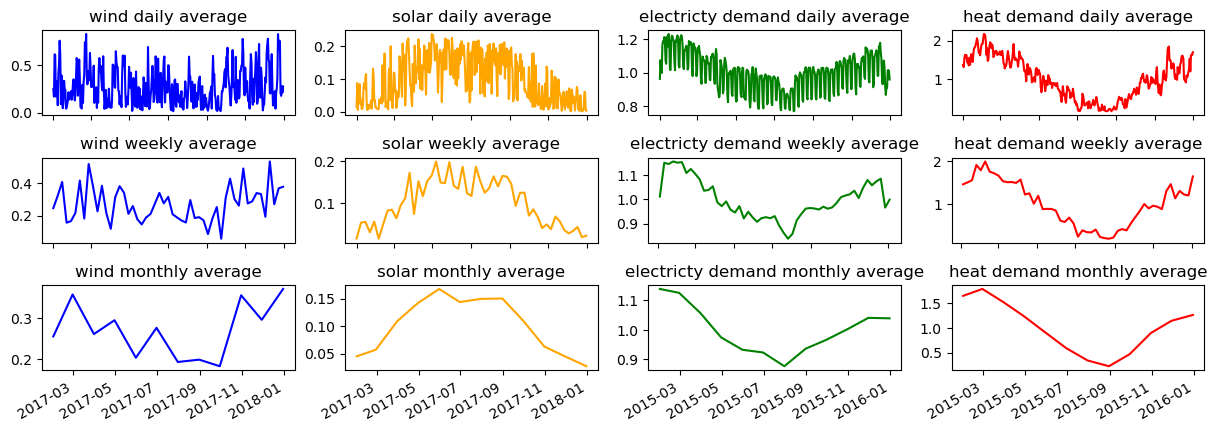

In [3]:
fig, axs = plt.subplots(3,4, figsize=(15,5))
times=['daily', 'weekly', 'monthly']
for i,average_time in enumerate(['D','W','M']) :

    solar_CF_timedavg = solar_CF.groupby(by=pd.Grouper(freq=average_time)).mean()
    wind_CF_timedavg = wind_CF.groupby(by=pd.Grouper(freq=average_time)).mean()
    el_dm_timedavg = el_dm.groupby(by=pd.Grouper(freq=average_time)).mean()
    heat_dm_timedavg = heat_dm.groupby(by=pd.Grouper(freq=average_time)).mean()
    
    
    axs[i,0].plot(wind_CF_timedavg['DNK'],color='blue')
    axs[i,0].set_title('wind {} average'.format(times[i]))
    axs[i,1].plot(solar_CF_timedavg['DNK'],color='orange')
    axs[i,1].set_title('solar {} average'.format(times[i]))
    axs[i,2].plot(el_dm_timedavg['DNK'],color='green')
    axs[i,2].set_title('electricty demand {} average'.format(times[i]))
    axs[i,3].plot(heat_dm_timedavg['DNK'],color='red')
    axs[i,3].set_title('heat demand {} average'.format(times[i]))
    
fig.autofmt_xdate()
fig.subplots_adjust(hspace=0.5)


3.One useful way of investigating the previous question is by calculating the Fourier Power Spec- tra of the time series. Do so and plot the Fourier Power Spectra for wind and solar capacity factor time series. Are these results in agreement with sections 1 and 2?


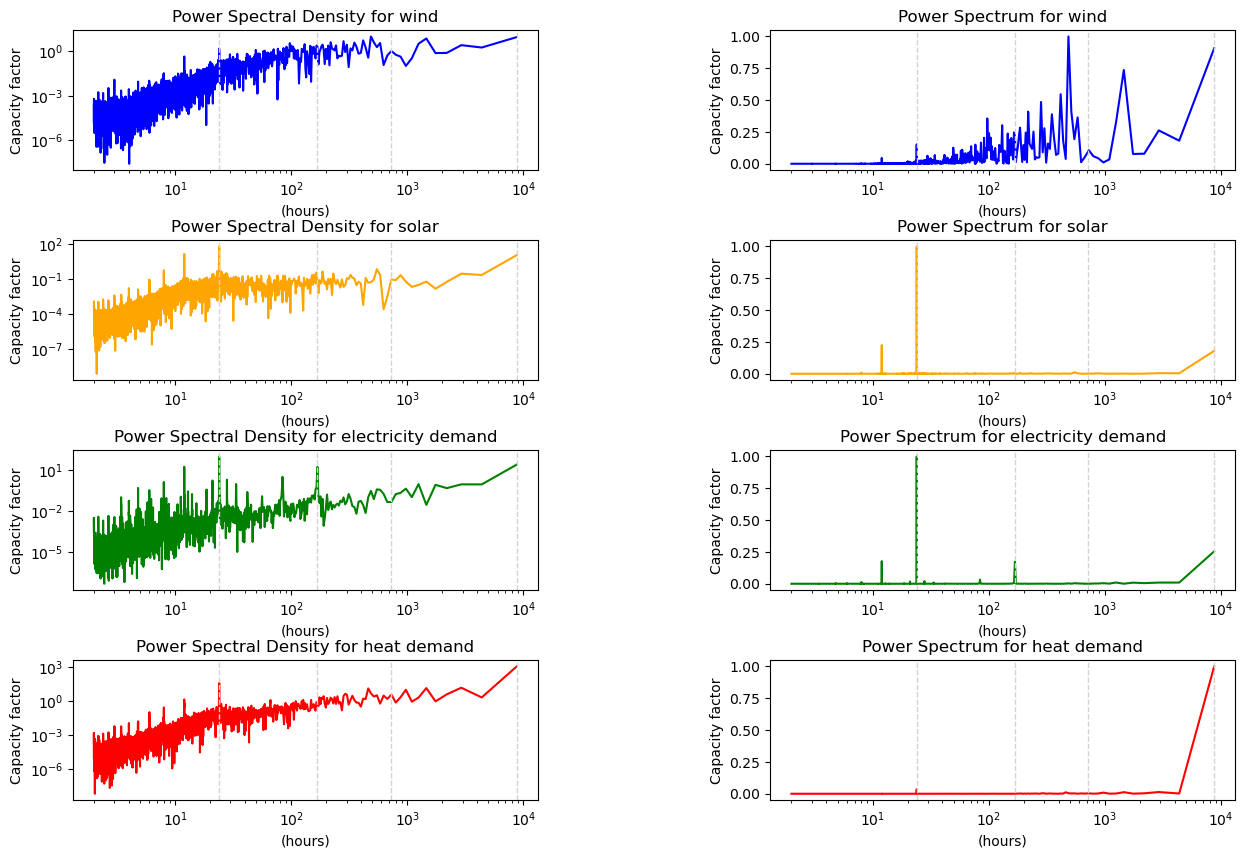

In [4]:
import numpy as np

fig, axs = plt.subplots(4,2, figsize=(15,10))


def spectrum1(h, dt=1):
    nt = len(h)
    npositive = nt//2
    pslice = slice(1, npositive)
    freqs = np.array([f for f in np.arange(0,dt,1/(nt))])[pslice]  
    ft = np.fft.fft(h)[pslice]
    psraw = (np.abs(ft)/nt) ** 2

    # Convert PS to Power Spectral Density
    psdraw = psraw * dt * nt  # nt * dt is record length
    return freqs, psraw, psdraw

color=['blue','orange','green','red']
vars=['wind', 'solar', 'electricity demand', 'heat demand']
for i,series in enumerate([wind_CF,solar_CF,el_dm,heat_dm]) :

 data=series.copy()
 data.reset_index(drop = True,inplace=True)

 dt=1
 freqs1, ps1, psd1 = spectrum1(data['DNK'], dt=dt)

 axs[i,0].loglog(1/freqs1, psd1, color[i],)
 axs[i,1].semilogx(1/freqs1, ps1/ps1.max(), color[i], )
 axs[i,0].set_title('Power Spectral Density for {}'.format(vars[i]))
 axs[i,1].set_title('Power Spectrum for {}'.format(vars[i]))
    
 axs[i,1].axvline(x = 24, c="lightgrey", ls="--", lw=1)
 axs[i,1].axvline(x = 168, c="lightgrey", ls="--", lw=1)
 axs[i,1].axvline(x = 720, c="lightgrey", ls="--", lw=1)
 axs[i,1].axvline(x = 8760, c="lightgrey", ls="--", lw=1)
    
 axs[i,0].axvline(x = 24, c="lightgrey", ls="--", lw=1)
 axs[i,0].axvline(x = 168, c="lightgrey", ls="--", lw=1)
 axs[i,0].axvline(x = 720, c="lightgrey", ls="--", lw=1)
 axs[i,0].axvline(x = 8760, c="lightgrey", ls="--", lw=1)



for ax in axs.flat:
    ax.set_xlabel('(hours)')
    ax.set_ylabel('Capacity factor')
    
fig.subplots_adjust(hspace=0.5, wspace=0.5)

4.Plot the duration curve (sorted capacity factors values) for every technology. What percentage of the potential wind and solar energy will be lost if the potential generation is curtailed for the 100 hours with the highest capacity factors? What about if curtailment affects the 1000 hours with the highest capacity factors?


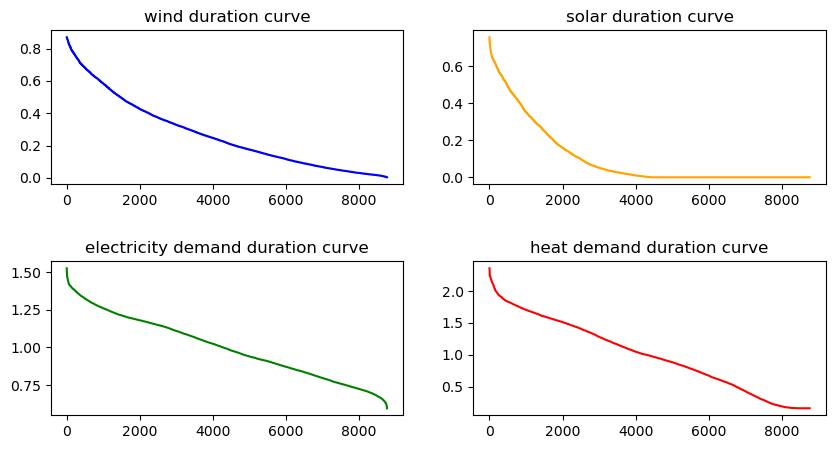

In [12]:
fig, axs = plt.subplots(2,2, figsize=(10,5))

solar_duration = solar_CF['DNK'].sort_values(ascending=False).reset_index(drop=True)
wind_duration = wind_CF['DNK'].sort_values(ascending=False).reset_index(drop=True)
el_duration = el_dm['DNK'].sort_values(ascending=False).reset_index(drop=True)
heat_duration = heat_dm['DNK'].sort_values(ascending=False).reset_index(drop=True)


axs[0,0].plot(wind_duration,color='blue')
axs[0,0].set_title('wind duration curve')
axs[0,1].plot(solar_duration,color='orange')
axs[0,1].set_title('solar duration curve')
axs[1,0].plot(el_duration,color='green')
axs[1,0].set_title('electricity demand duration curve')
axs[1,1].plot(heat_duration,color='red')
axs[1,1].set_title('heat demand duration curve')


fig.subplots_adjust(hspace=0.5)

5.Calculate the ramps for every technology for every hour of the year. We define ramp as the difference between the capacity factor in an hour and the capacity factor in the previous hour. Plot the distribution of ramps for wind and solar. Which technology shows the highest values?


Max ramp for wind is: 0.178 and for solar is: 0.265 and for electricity demand is: 0.239 and for heat demand is: 0.332


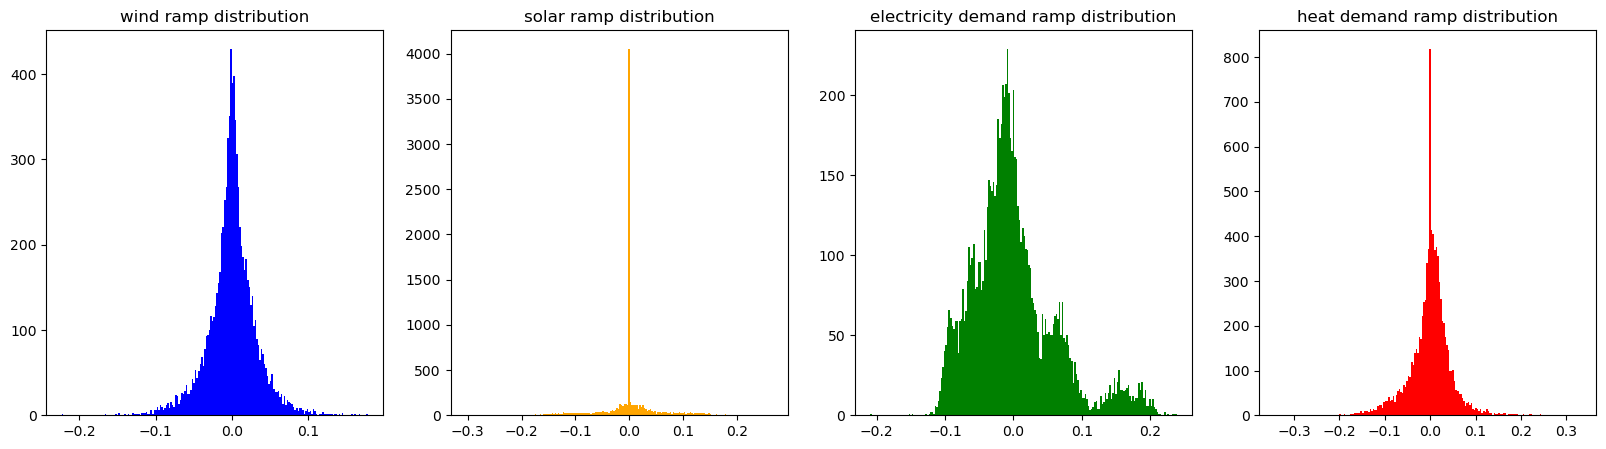

In [7]:
import seaborn as sns

fig, axs = plt.subplots(1,4, figsize=(20,5))

solar_CF_ramp=solar_CF.diff()['DNK'].fillna(0)
wind_CF_ramp=wind_CF.diff()['DNK'].fillna(0)
el_dm_ramp=el_dm.diff()['DNK'].fillna(0)
heat_dm_ramp=heat_dm.diff()['DNK'].fillna(0)


axs[0].hist(wind_CF_ramp,bins=200,color='blue')
axs[0].set_title('wind ramp distribution')
axs[1].hist(solar_CF_ramp,bins=200,color='orange')
axs[1].set_title('solar ramp distribution')
axs[2].hist(el_dm_ramp,bins=200,color='green')
axs[2].set_title('electricity demand ramp distribution')
axs[3].hist(heat_dm_ramp,bins=200,color='red')
axs[3].set_title('heat demand ramp distribution')

print('Max ramp for wind is:',round(wind_CF_ramp.max(),3),
      'and for solar is:',round(solar_CF_ramp.max(),3),
      'and for electricity demand is:',round(el_dm_ramp.max(),3),
      'and for heat demand is:',round(heat_dm_ramp.max(),3))


6.Let’s look now at the interannual variability. For every technology, calculate the annual average capacity factor for the most recent year for which you have data. Then, calculate the annual capacity factor for every year for which you have data. Estimate the average value for all the years and the variance


Text(0.5, 1.0, 'solar yearly averages and deviation')

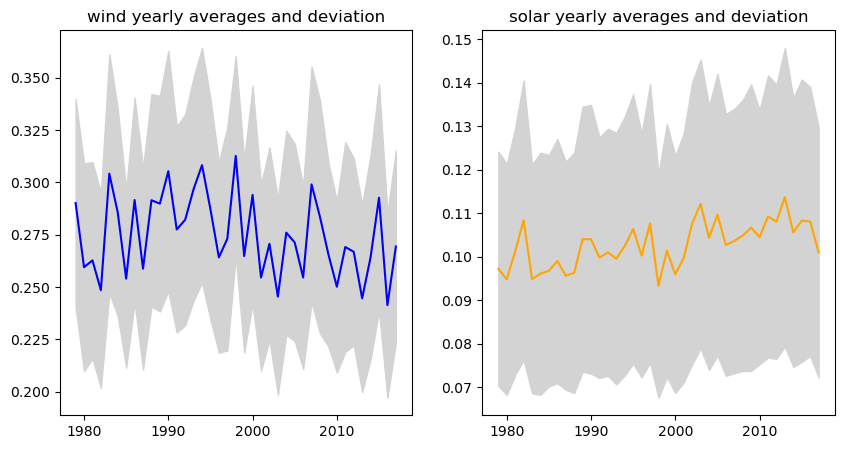

In [8]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

solar_CF_all.index = pd.to_datetime(solar_CF_all.index)
wind_CF_all.index = pd.to_datetime(wind_CF_all.index)

solar_CF_yearavg = solar_CF_all.groupby(by=pd.Grouper(freq='Y'))['DNK'].mean()
wind_CF_yearavg = wind_CF_all.groupby(by=pd.Grouper(freq='Y'))['DNK'].mean()

solar_CF_yearstd = solar_CF_all.groupby(by=pd.Grouper(freq='Y'))['DNK'].var()
wind_CF_yearstd = wind_CF_all.groupby(by=pd.Grouper(freq='Y'))['DNK'].var()

# axs[0].plot(wind_CF_yearavg.index.year,wind_CF_yearavg,color='blue')
# axs[0].fill_between(wind_CF_yearavg.index.year,(wind_CF_yearavg-wind_CF_yearstd).squeeze(),
#                  (wind_CF_yearavg+wind_CF_yearstd).squeeze(),color='lightgrey')
# axs[0].set_title('wind yearly averages and deviation')

# axs[1].plot(solar_CF_yearavg.index.year,solar_CF_yearavg,color='orange')
# axs[1].fill_between(solar_CF_yearavg.index.year,(solar_CF_yearavg-solar_CF_yearstd).squeeze(),
#                  (solar_CF_yearavg+solar_CF_yearstd).squeeze(),color='lightgrey')
# axs[1].set_title('solar yearly averages and deviation')



axs[0].plot(wind_CF_yearavg.index.year,wind_CF_yearavg,color='blue')
axs[0].fill_between(wind_CF_yearavg.index.year,(wind_CF_yearavg-wind_CF_yearstd),
                 (wind_CF_yearavg+wind_CF_yearstd),color='lightgrey')
axs[0].set_title('wind yearly averages and deviation')

axs[1].plot(solar_CF_yearavg.index.year,solar_CF_yearavg,color='orange')
axs[1].fill_between(solar_CF_yearavg.index.year,(solar_CF_yearavg-solar_CF_yearstd),
                 (solar_CF_yearavg+solar_CF_yearstd),color='lightgrey')
axs[1].set_title('solar yearly averages and deviation')